In [12]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [13]:
import numpy as np
import pandas as pd

In [14]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [15]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [16]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [17]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine,reflect=True)

In [18]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [19]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [20]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [21]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
from sqlalchemy import inspect
inspector = inspect(engine)
inspector.get_table_names()



['measurement', 'station']

In [22]:
#table measurement columns 
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'],c['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [23]:
# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [24]:
# Calculate the date 1 year ago from the last data point in the database
latest_dt=session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(latest_dt)


('2017-08-23',)


In [29]:
one_year_ago=dt.date(2017,8,23) - dt.timedelta(days=365)
print(one_year_ago)

2016-08-23


In [30]:
# Perform a query to retrieve the data and precipitation scores
measure_precipitation = session.query(Measurement.prcp,Measurement.date).\
    filter(Measurement.date > '2016-08-23').\
    order_by(Measurement.date).all()
measure_precipitation



[(0.08, '2016-08-24'),
 (2.15, '2016-08-24'),
 (2.28, '2016-08-24'),
 (None, '2016-08-24'),
 (1.22, '2016-08-24'),
 (2.15, '2016-08-24'),
 (1.45, '2016-08-24'),
 (0.08, '2016-08-25'),
 (0.08, '2016-08-25'),
 (0.0, '2016-08-25'),
 (0.0, '2016-08-25'),
 (0.21, '2016-08-25'),
 (0.06, '2016-08-25'),
 (0.11, '2016-08-25'),
 (0.0, '2016-08-26'),
 (0.03, '2016-08-26'),
 (0.02, '2016-08-26'),
 (0.04, '2016-08-26'),
 (0.0, '2016-08-26'),
 (0.01, '2016-08-26'),
 (0.0, '2016-08-27'),
 (0.18, '2016-08-27'),
 (0.02, '2016-08-27'),
 (0.0, '2016-08-27'),
 (0.12, '2016-08-27'),
 (None, '2016-08-27'),
 (0.01, '2016-08-28'),
 (0.14, '2016-08-28'),
 (0.14, '2016-08-28'),
 (0.14, '2016-08-28'),
 (0.6, '2016-08-28'),
 (2.07, '2016-08-28'),
 (0.0, '2016-08-29'),
 (0.17, '2016-08-29'),
 (0.04, '2016-08-29'),
 (None, '2016-08-29'),
 (0.0, '2016-08-29'),
 (0.35, '2016-08-29'),
 (0.9, '2016-08-29'),
 (0.0, '2016-08-30'),
 (0.0, '2016-08-30'),
 (0.02, '2016-08-30'),
 (0.0, '2016-08-30'),
 (0.0, '2016-08-30'),
 (

In [32]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(measure_precipitation,columns = ['Precipitation','Dates'])
df.set_index('Dates')


,Precipitation
Dates,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,NaN
2016-08-24,1.22
...,...
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.00


In [33]:
# Sort the dataframe by date
df_dates=df.sort_values(by='Dates')


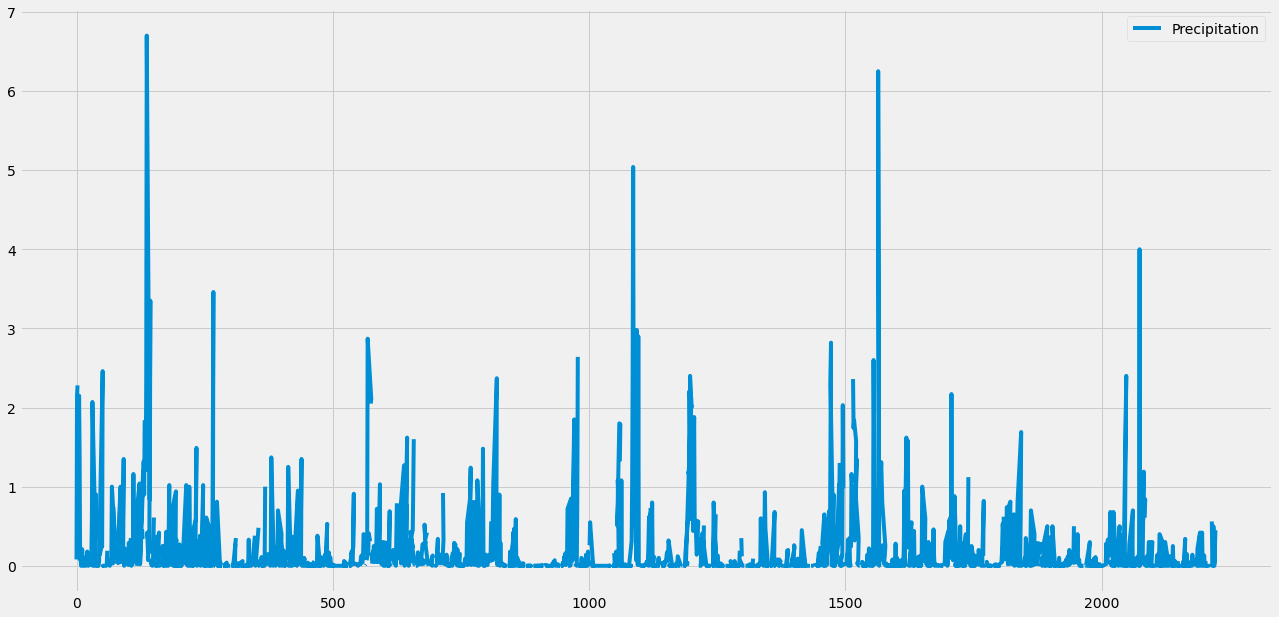

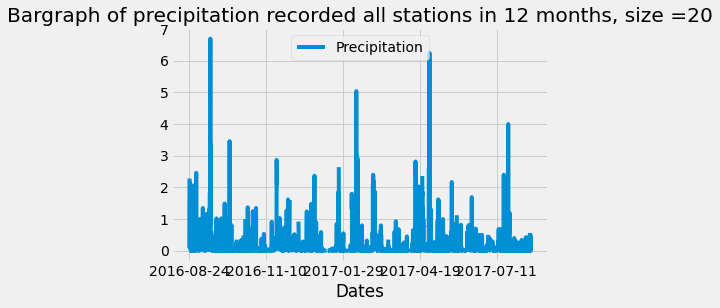

In [34]:
# Use Pandas Plotting with Matplotlib to plot the data
df_dates.plot(figsize=(20,10))
df_dates.plot(x='Dates', grid=True)
plt.title("Bargraph of precipitation recorded all stations in 12 months, size =20")
plt.show()

In [35]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df_dates.describe()

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [36]:
# Design a query to show how many stations are available in this dataset?
station_count=session.query(func.count(Measurement.station)).all()
station_count

[(19550)]

In [37]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
most_active_stations=session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station).\
                     order_by(func.count(Measurement.station).desc()).all()
most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [38]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
lowest_temp = session.query(func.min(Measurement.tobs)).\
              filter(Measurement.station=='USC00519281').all()
lowest_temp


[(54.0)]

In [39]:
highest_temp = session.query(func.max(Measurement.tobs)).\
              filter(Measurement.station=='USC00519281').all()
highest_temp

[(85.0)]

In [40]:
avg_temp = session.query(func.avg(Measurement.tobs)).\
              filter(Measurement.station=='USC00519281').all()
avg_temp

[(71.66378066378067)]

In [42]:
# Choose the station with the highest number of temperature observations.
latest_day = session.query(Measurement.date).filter(Measurement.station=='USC00519281').\
             order_by(Measurement.date.desc()).first()
latest_day

('2017-08-18')

In [44]:
one_year_before=dt.date(2017,8,18) - dt.timedelta(days=365)
print(one_year_before)

2016-08-18


In [45]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
data=session.query(Measurement.tobs).\
                  filter(Measurement.station=='USC00519281').\
                  filter(Measurement.date >='2017,8,23').all()
data

[(72.0),
 (70.0),
 (64.0),
 (63.0),
 (63.0),
 (62.0),
 (70.0),
 (70.0),
 (62.0),
 (62.0),
 (63.0),
 (65.0),
 (69.0),
 (77.0),
 (70.0),
 (74.0),
 (69.0),
 (72.0),
 (71.0),
 (69.0),
 (71.0),
 (71.0),
 (72.0),
 (72.0),
 (69.0),
 (70.0),
 (66.0),
 (65.0),
 (69.0),
 (68.0),
 (68.0),
 (68.0),
 (59.0),
 (60.0),
 (70.0),
 (73.0),
 (75.0),
 (64.0),
 (59.0),
 (59.0),
 (62.0),
 (68.0),
 (70.0),
 (73.0),
 (79.0),
 (75.0),
 (65.0),
 (70.0),
 (74.0),
 (70.0),
 (70.0),
 (71.0),
 (71.0),
 (71.0),
 (69.0),
 (61.0),
 (67.0),
 (65.0),
 (72.0),
 (71.0),
 (73.0),
 (72.0),
 (77.0),
 (73.0),
 (67.0),
 (62.0),
 (64.0),
 (67.0),
 (66.0),
 (81.0),
 (69.0),
 (66.0),
 (67.0),
 (69.0),
 (66.0),
 (68.0),
 (65.0),
 (74.0),
 (69.0),
 (72.0),
 (73.0),
 (72.0),
 (71.0),
 (76.0),
 (77.0),
 (76.0),
 (74.0),
 (68.0),
 (73.0),
 (71.0),
 (74.0),
 (75.0),
 (70.0),
 (67.0),
 (71.0),
 (67.0),
 (74.0),
 (77.0),
 (78.0),
 (67.0),
 (70.0),
 (69.0),
 (69.0),
 (74.0),
 (78.0),
 (71.0),
 (67.0),
 (68.0),
 (67.0),
 (76.0),
 (69.0),
 

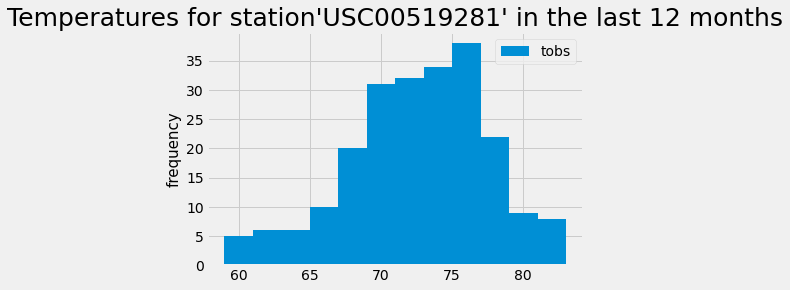

In [46]:
new_df=pd.DataFrame(data,columns=['Tobs'])
new_df.hist(bins=12)

plt.ylabel("frequency",fontsize =15)
plt.title("Temperatures for station'USC00519281' in the last 12 months",size =25)
labels=['tobs']
plt.legend(labels)
plt.show()

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
